#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading in the STS data set

In [2]:
# Taken from readme.txt downloaded with the STS-b benchmark data set

col_names = [
    "genre",
    "filename",
    "year",
    "id_from_source",
    "score",
    "sentence1",
    "sentence2",
    "extra1",
    "extra2"
]

In [4]:
sts_dataset = pd.read_csv('data/sts-train.csv', sep="\t", names=col_names)

## Exploratory analysis

(array([591., 298., 531., 347., 550., 425., 923., 649., 772., 625.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

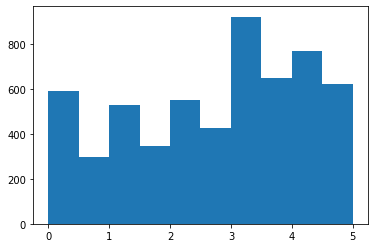

In [6]:
plt.hist(sts_dataset.iloc[:]["score"])

In [7]:
sts_dataset.iloc[:10][:]

,genre,filename,year,id_from_source,score,sentence1,sentence2,extra1,extra2
0,main-captions,MSRvid,2012test,1,5.00,A plane is taking off.,An air plane is taking off.,NaN,NaN
1,main-captions,MSRvid,2012test,4,3.80,A man is playing a large flute.,A man is playing a flute.,NaN,NaN
2,main-captions,MSRvid,2012test,5,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,NaN,NaN
3,main-captions,MSRvid,2012test,6,2.60,Three men are playing chess.,Two men are playing chess.,NaN,NaN
4,main-captions,MSRvid,2012test,9,4.25,A man is playing the cello.,A man seated is playing the cello.,NaN,NaN
5,main-captions,MSRvid,2012test,11,4.25,Some men are fighting.,Two men are fighting.,NaN,NaN
6,main-captions,MSRvid,2012test,12,0.50,A man is smoking.,A man is skating.,NaN,NaN
7,main-captions,MSRvid,2012test,13,1.60,The man is playing the piano.,The man is playing the guitar.,NaN,NaN
8,main-captions,MSRvid,2012test,14,2.20,A man is playing on a guitar and singing.,A woman is playing an acoustic guitar and sing...,NaN,NaN
9,main-captions,MSRvid,2012test,16,5.00,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,NaN,NaN


## Processing STS for word2vec model

In [8]:
sts_text = sts_dataset[["sentence1","sentence2"]]

In [9]:
sts_text

,sentence1,sentence2
0,A plane is taking off.,An air plane is taking off.
1,A man is playing a large flute.,A man is playing a flute.
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,Three men are playing chess.,Two men are playing chess.
4,A man is playing the cello.,A man seated is playing the cello.
...,...,...
5706,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia
5707,Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...
5708,President heading to Bahrain,President Xi: China to continue help to fight ...
5709,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders


In [70]:
text_list = sts_text.values.flatten()

In [71]:
text_list

array(['A plane is taking off.', 'An air plane is taking off.',
       'A man is playing a large flute.', ...,
       'China Scrambles to Reassure Jittery Stock Traders',
       'Putin spokesman: Doping charges appear unfounded',
       'The Latest on Severe Weather: 1 Dead in Texas After Tornado'],
      dtype=object)

In [37]:
import string
import nltk
from tqdm import tqdm

In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/ubuntu-
[nltk_data]     code/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ubuntu-
[nltk_data]     code/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
from nltk.tokenize import word_tokenize

for i in tqdm(range(len(text_list))):
    current_sentence = str(text_list[i]).lower()
    text_list[i] = word_tokenize(current_sentence)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11422/11422 [00:00<00:00, 14164.78it/s]


In [68]:
# Function to tokenize a list of sentences
# Input - list of strings
# Output - list of array of words (tokens)
def tokenize_list(sentence_list):
    
    # Loop all the sentences in the list
    for i in tqdm(range(len(sentence_list))):
        current_sentence = str(sentence_list[i]).lower()
        sentence_list[i] = word_tokenize(current_sentence)
        
    return sentence_list

In [72]:
tokenize_list(text_list)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11422/11422 [00:00<00:00, 14606.63it/s]


array([list(['a', 'plane', 'is', 'taking', 'off', '.']),
       list(['an', 'air', 'plane', 'is', 'taking', 'off', '.']),
       list(['a', 'man', 'is', 'playing', 'a', 'large', 'flute', '.']),
       ...,
       list(['china', 'scrambles', 'to', 'reassure', 'jittery', 'stock', 'traders']),
       list(['putin', 'spokesman', ':', 'doping', 'charges', 'appear', 'unfounded']),
       list(['the', 'latest', 'on', 'severe', 'weather', ':', '1', 'dead', 'in', 'texas', 'after', 'tornado'])],
      dtype=object)

In [41]:
# Remove 'man' from the german stopwords
german_stopwords = stopwords.words("german")
german_stopwords.remove('man')

In [ ]:
# Function to filter sentences to word2vec format
def data_to_word2vec_format(list_of_sentences):
    
    #Tokenize the data
    list_of_sentences = tokenize_list(list_of_sentences)
    
    #Filter the tokenized data
    
    

In [74]:
# Function for removing punctuation as well as german and english stopwords
# Input - list of tokenized sentences
# Output - list of tokenized sentences with desired words removed
def filter_sentences(token_sentence_list):
    
    # Remove 'man' from the german stopwords
    german_stopwords = stopwords.words("german")
    german_stopwords.remove('man')
    
    for i in tqdm(range(len(token_sentence_list))):
        sentence = token_sentence_list[i]

        filter_sentence = []

        for word in sentence:
            if not word in string.punctuation:
                if not (word in stopwords.words("english") or word in german_stopwords):
                    filter_sentence.append(word)

        token_sentence_list[i] = filter_sentence
    
    return token_sentence_list

In [42]:
for i in tqdm(range(len(text_list))):
    sentence = text_list[i]
    
    filter_sentence = []
    
    for word in sentence:
        if not word in string.punctuation:
            if not (word in stopwords.words("english") or word in german_stopwords):
                filter_sentence.append(word)

    text_list[i] = filter_sentence

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11422/11422 [00:06<00:00, 1736.68it/s]


In [43]:
# Writing the responses to a txt file
with open('data/sts_sentences_text_clean_data.txt', 'w') as f:
    for sentence in text_list:
        # Check for empty sentences
        if not sentence == []:
            f.write("%s\n" % sentence)

## Processing STS for SimCSE model

In [52]:
simcse_output = sts_text.values.flatten()

In [53]:
# Writing the responses to a txt file
with open('data/sts_sentences_clean_data.txt', 'w') as f:
    for sentence in simcse_output:
        # Check for empty sentences
        if not sentence == []:
            f.write("%s\n" % sentence)

In [54]:
del simcse_output

## Processing STS for Clustering stage

### SimCSE

In [62]:
sts_test_dataset = pd.read_csv('data/sts-test.csv', sep="\t", names=col_names)

In [66]:
clustering_columns = ['score','sentence1','sentence2']
cluster_data = sts_test_dataset[clustering_columns] 

In [ ]:
# TODO: Export to file .csv

### Word2vec

In [67]:
cluster_data

,score,sentence1,sentence2
0,2.5,A girl is styling her hair.,A girl is brushing her hair.
1,3.6,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.
2,5.0,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.
3,4.2,A man is cutting up a cucumber.,A man is slicing a cucumber.
4,1.5,A man is playing a harp.,A man is playing a keyboard.
...,...,...,...
1374,0.0,"Philippines, Canada pledge to further boost re...",Philippines saves 100 after ferry sinks
1375,1.0,Israel bars Palestinians from Jerusalem's Old ...,"Two-state solution between Palestinians, Israe..."
1376,1.0,How much do you know about Secret Service?,Lawmakers from both sides express outrage at S...
1377,0.0,Obama Struggles to Soothe Saudi Fears As Iran ...,Myanmar Struggles to Finalize Voter Lists for ...
